# Ejercicio análisi exploratorio parte 1

Utilizando los datos sobre automoviles extraídos en un archivo csv via webscraping (están almacenados en un archivo csv en la misma ruta que este notebook), responda a las siguientes preguntas:

1. [La asimetría de la variable `caballos_potencia` es negativa?](#1)
2. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles tienen valores atípicos en ambos extremos?](#2)
3. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles no tienen valores atípicos?](#3)
4. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`,, ¿cuáles son las variables con mayor y menor asimetría?](#4)
5. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, muestre los valores atípicos de aquellas variables que los tengan en ambos extremos.](#5)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

automoviles = pd.read_csv('./csv/datos_automoviles.csv')
automoviles.head()

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0


### 1. La asimetría de la variable `caballos_potencia` es negativa?

<a id="1"></a>

In [3]:
print('Asimetría de caballos_potencia')
automoviles['caballos_potencia'].skew()

Asimetría de caballos_potencia


1.034079427703104

### 2. Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles tienen valores atípicos en ambos extremos?

<a id="2"></a>

Para saber cúales variables tiene valores atípicos, se puede utilizar gráficos o métido el analítico. En este caso, se utilizarán gráficas de dos tipos:

- Una será una gráfica de distribución donde se dibujarán líneas verticales a la altura de ambos valores atípicos.
- La otra, un *gráfico de caja* el cual nos señala mediante un círculo si existen o no valores atípicos

Cabe resaltar que la primera manera no indica de manera precisa la existencia de valores atípicos, pero se lo muestra por propósitos ilustrativos. En cambio, el *gráfico de caja* si indica con exactidud si existen o no valores atípicos.

In [18]:
def graficar_distribucion_con_valores_atipicos(columna):
    q1 = automoviles.describe()[columna]['25%']
    q3 = automoviles.describe()[columna]['75%']
    iqr = q3 - q1
    limite_derecho = q3 + 1.5 * iqr
    limite_izquierdo = q1 - 1.5 * iqr

    sns.kdeplot(automoviles[columna], shade=True)
    plt.axvline( limite_derecho, color='b')
    plt.axvline( limite_izquierdo, color='b')

#### 2.1 Valores atípicos `caballos_potencia`

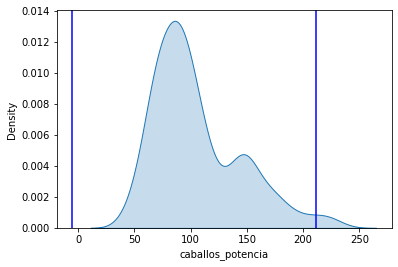

In [5]:
graficar_distribucion_con_valores_atipicos('caballos_potencia')

<AxesSubplot:>

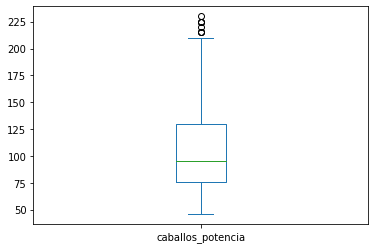

In [6]:
automoviles['caballos_potencia'].plot.box()

#### 2.2 Valores atípicos `desplazamiento`

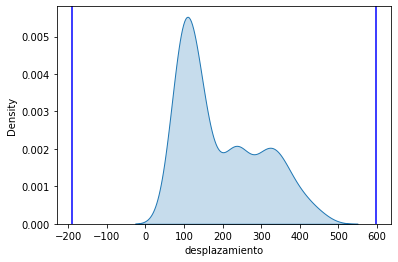

In [7]:
graficar_distribucion_con_valores_atipicos('desplazamiento')

<AxesSubplot:>

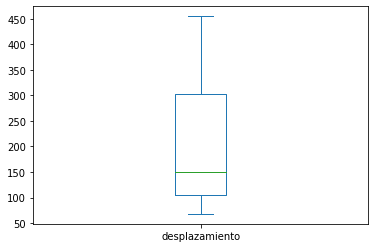

In [8]:
automoviles['desplazamiento'].plot.box()

#### 2.3 Valores atípicos `mpg`

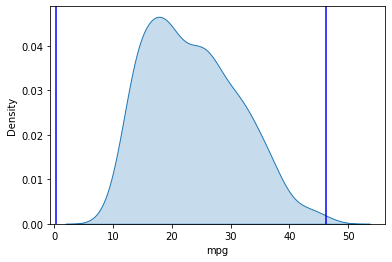

In [9]:
graficar_distribucion_con_valores_atipicos('mpg')

<AxesSubplot:>

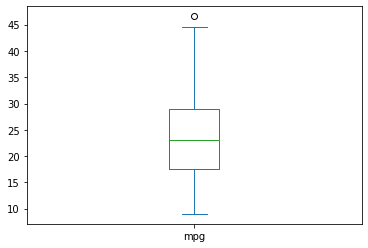

In [10]:
automoviles['mpg'].plot.box()

#### 2.4 Valores atípicos `aceleracion`

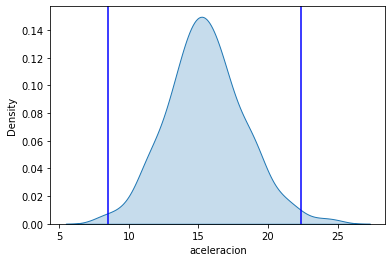

In [11]:
graficar_distribucion_con_valores_atipicos('aceleracion')

<AxesSubplot:>

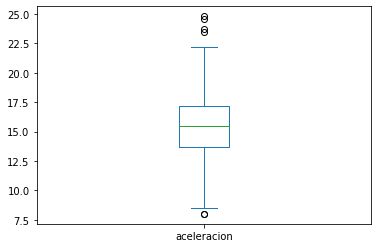

In [12]:
automoviles['aceleracion'].plot.box()

#### Respuesta pregunta 2: la `aceleración` es la única variable que tiene valores atípicos en ambos extremos

### 3. Entre las variables:  `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles no tienen valores atípicos?

<a id="3"></a>

Sobre la base de los gráficos hechos en el anterior inciso, `desplazamiento` es la variable que no tiene valores atípicos

### 4. Entre las variables:  `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles son las variables con mayor y menor asimetría?

<a id="4"></a>

In [13]:
print('caballos_potencia: ', automoviles['caballos_potencia'].skew())
print('desplazamiento: ', automoviles['desplazamiento'].skew())
print('mpg: ', automoviles['mpg'].skew())
print('aceleracion:', automoviles['aceleracion'].skew())

caballos_potencia:  1.034079427703104
desplazamiento:  0.6941299865999901
mpg:  0.45706634399491936
aceleracion: 0.23022375946556034


### 5. Entre las variables:  `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, muestre los valores atípicos de aquellas variables que los tengan en ambos extremos

<a id="5"></a>

Como se pudo observar en el __[inciso 2](#2)__ la variable `aceleracion` es la única que tiene valores atípicos en ambos extremos.

In [14]:
q1 = automoviles.describe()['aceleracion']['25%']
q3 = automoviles.describe()['aceleracion']['75%']
iqr = q3 - q1
limite_derecho = q3 + 1.5 * iqr
limite_izquierdo = q1 - 1.5 * iqr

Valores atípicos menores o iguales al límite inferior:

In [15]:
automoviles.loc[automoviles['aceleracion'] <= limite_izquierdo]

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
16,Plymouth 'Cuda 340,8,3609,1970,USA,8.0,14.0,160.0,340.0
17,Ford Mustang Boss 302,8,3353,1970,USA,8.0,NaN,140.0,302.0


Valores atípicos mayores o iguales al límite superior:

In [16]:
automoviles.loc[automoviles['aceleracion'] >= limite_derecho]

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
66,Volkswagen Type 3,4,2254,1972,Europe,23.5,23.0,54.0,97.0
306,Peugeot 504,4,3190,1979,Europe,24.8,27.2,71.0,141.0
333,Vw Dasher (Diesel),4,2335,1980,Europe,23.7,43.4,48.0,90.0
402,Vw Pickup,4,2130,1982,Europe,24.6,44.0,52.0,97.0


- Hay alguna relacion entre el territorio y los caballos de potencia?
- Hay correlación entre los caballos de potencia y las millas por galón? 
- Si existe es un relación, ambas variables se mueven en la misma dirección?
- Compruebe la dirección de la relación con una visualización.

In [31]:
def territorio_escrito_a_num(territorio):
   return territorio.map({ 'Europe': 1, 'USA': 2, 'Japan': 3 })

automoviles['territorio_num'] = territorio_escrito_a_num(automoviles['territorio'])
automoviles

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento,territorio_num
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0,2
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0,2
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0,2
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0,2
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0,2
...,...,...,...,...,...,...,...,...,...,...
401,Ford Mustang Gl,4,2790,1982,USA,15.6,27.0,86.0,140.0,2
402,Vw Pickup,4,2130,1982,Europe,24.6,44.0,52.0,97.0,1
403,Dodge Rampage,4,2295,1982,USA,11.6,32.0,84.0,135.0,2
404,Ford Ranger,4,2625,1982,USA,18.6,28.0,79.0,120.0,2


In [33]:
automoviles.corr()

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento,territorio_num
cilindros,1.000000,0.895220,-0.360762,-0.522452,-0.775396,0.844158,0.951787,-0.027908
peso,0.895220,1.000000,-0.315389,-0.430086,-0.831741,0.866586,0.932475,-0.094713
anio,-0.360762,-0.315389,1.000000,0.301992,0.579267,-0.424419,-0.381714,0.143544
aceleracion,-0.522452,-0.430086,0.301992,1.000000,0.420289,-0.697124,-0.557984,-0.062585
mpg,-0.775396,-0.831741,0.579267,0.420289,1.000000,-0.778427,-0.804203,0.127164
caballos_potencia,0.844158,0.866586,-0.424419,-0.697124,-0.778427,1.000000,0.898326,-0.030029
desplazamiento,0.951787,0.932475,-0.381714,-0.557984,-0.804203,0.898326,1.000000,-0.040180
territorio_num,-0.027908,-0.094713,0.143544,-0.062585,0.127164,-0.030029,-0.040180,1.000000


Los caballos de potención tienen una relación con las millas por galón, debido el valor de correlación es 0.77 y es próximo a -1. Lo cual indica una relación inversa.

<AxesSubplot:title={'center':'scatter plot : Tip by Total bill'}, xlabel='caballos_potencia', ylabel='mpg'>

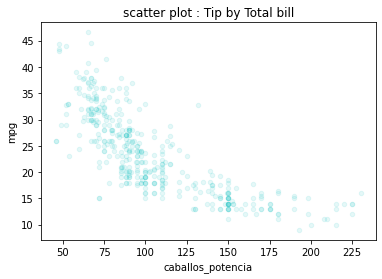

In [34]:

automoviles.plot.scatter(x='caballos_potencia', y='mpg', color='c', title='scatter plot : Tip by Total bill', alpha=0.1)


No se mueven en la misma dirección

In [35]:
automoviles.cov()

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento,territorio_num
cilindros,2.931491,1298.254662,-2.315526,-2.507662,-10.308911,56.184831,170.982829,-0.029265
peso,1298.254662,717416.332056,-1001.421626,-1021.220272,-5505.211745,28538.206404,82868.813665,-49.132056
anio,-2.315526,-1001.421626,14.053032,3.173656,16.741163,-61.462080,-150.138405,0.329563
aceleracion,-2.507662,-1021.220272,3.173656,7.858821,9.058930,-75.801907,-164.122683,-0.107452
mpg,-10.308911,-5505.211745,16.741163,9.058930,61.089611,-233.857926,-655.402318,0.608486
caballos_potencia,56.184831,28538.206404,-61.462080,-75.801907,-233.857926,1503.018239,3666.724846,-0.713434
desplazamiento,170.982829,82868.813665,-150.138405,-164.122683,-655.402318,3666.724846,11008.722272,-2.581919
territorio_num,-0.029265,-49.132056,0.329563,-0.107452,0.608486,-0.713434,-2.581919,0.375090
